In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.cm import PRGn
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

In [2]:
dataset = {}
for i in os.listdir(r"C:\Users\harsh\OneDrive\Desktop\test juypter\archive"):
    dataset[i.replace(".csv","_df")] = pd.read_csv(os.path.join(r"C:\Users\harsh\OneDrive\Desktop\test juypter\archive",i ))
print(f'list of dfs available : {dataset.keys()}')

list of dfs available : dict_keys(['circuits_df', 'constructors_df', 'constructor_results_df', 'constructor_standings_df', 'drivers_df', 'driver_standings_df', 'lap_times_df', 'pit_stops_df', 'qualifying_df', 'races_df', 'results_df', 'seasons_df', 'sprint_results_df', 'status_df'])


In [3]:
plt.style.use('dark_background') 
colormap = plt.cm.get_cmap('RdYlBu')

C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\1008989045.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlBu')


In [4]:
# year of RedBull entry to F1:
constructorId = 9
filtered_results_df = dataset["results_df"][dataset["results_df"]["constructorId"] == constructorId]
# print(filtered_results_df.head())
races_participated = list(set(filtered_results_df["raceId"].tolist()))
races_participated.sort()

years_participated = [] #(race_id , year)
for i in races_participated:
    years_participated.append((i,int(dataset["races_df"].loc[dataset["races_df"]["raceId"] == i, "year"].values)))
# print(years_participated)

entry_year = min([x[1] for x in years_participated])
print(f'RedBull started racing from year {entry_year}')

C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\1913413646.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  years_participated.append((i,int(dataset["races_df"].loc[dataset["races_df"]["raceId"] == i, "year"].values)))


RedBull started racing from year 2005


In [5]:
#RedBull started racing from year 2005 Austrian owned team's first campaign, following 2004 purchase of Jaguar squad (formerly Stewart Grand Prix, 1997-1999), proves highly successful. Amass more points in the first two races than Jaguar managed the entire previous season. Go on to finish a clear seventh in the standings.

C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\638907158.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  points_vs_years[int(year)] += points
C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\638907158.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  points_vs_years[int(year)] = points
C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\638907158.py:32: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  year = int(getYearOfRace(row['raceId']))


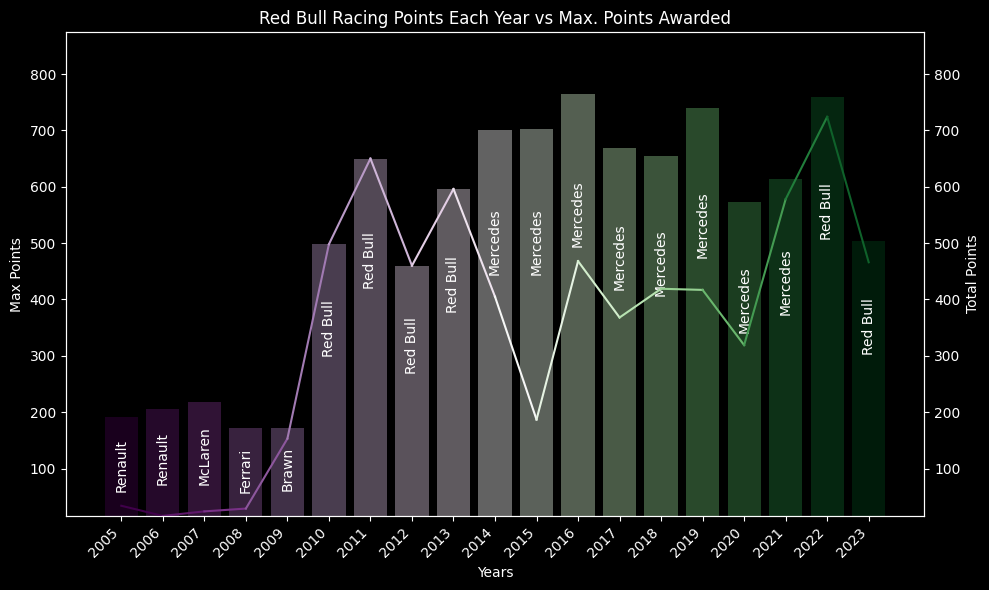

In [6]:
#RedBull Racing Constructor points from 2005 to 2022

points_vs_years = {}  # year : total_points

def getYearOfRace(raceId):
    year = dataset['races_df'].loc[dataset['races_df']['raceId'] == raceId, "year"]
    return year

def getConstructor(constructorId):
    constructor = dataset['constructors_df'].loc[dataset['constructors_df']['constructorId'] == constructorId, "name"]
    return constructor.item()

resultsOfRedbull = dataset['results_df'][(dataset['results_df']['constructorId'] == constructorId)]

for index, row in resultsOfRedbull.iterrows():
    raceId = row['raceId']
    points = int(row['points'])
    year = getYearOfRace(raceId)
    try:
        points_vs_years[int(year)] += points
    except:
        points_vs_years[int(year)] = points

points_vs_years = dict(sorted(points_vs_years.items(), key=lambda x: x[0]))
years = list(points_vs_years.keys())
points = list(points_vs_years.values())

each_constructor_points_years = {}
dataset['constructor_results_df']

for index, row in dataset['constructor_results_df'].iterrows():
    year = int(getYearOfRace(row['raceId']))
    if year >= 2005:
        point = row['points']
        if year in each_constructor_points_years.keys():
            if row['constructorId'] in each_constructor_points_years[year].keys():
                each_constructor_points_years[year][row['constructorId']] += point
            else:
                each_constructor_points_years[year][row['constructorId']] = point
        else:
            each_constructor_points_years[year] = {row['constructorId']: point}

max_points_years = {}
for i in each_constructor_points_years.keys():
    constructor_id = max(each_constructor_points_years[i], key=lambda k: each_constructor_points_years[i][k])
    max_points = max(each_constructor_points_years[i].values())
    max_points_years[i] = [max_points, constructor_id]

max_points_years = dict(sorted(max_points_years.items(), key=lambda x: x[0]))

years = list(max_points_years.keys())
max_points = [x[0] for x in list(max_points_years.values())]
constructor_ids = [x[1] for x in list(max_points_years.values())]
constructors = []
for i in constructor_ids:
    constructors.append(getConstructor(i))
# colormap = plt.cm.get_cmap('RdYlBu')
colors = np.linspace(0, 1, len(years))
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(years, max_points, color=PRGn(np.linspace(0, 1, len(years))), alpha=0.4)

for i, bar in enumerate(bars):
    height = bar.get_height()
    offset = 0.2 * height  # Set the offset as a fraction of the bar height
    ax1.text(bar.get_x() + bar.get_width() / 2, height - offset, constructors[i], ha='center', va='top', rotation='vertical')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45, ha='right')

ax1.set_xlabel('Years')
ax1.set_ylabel('Max Points')
ax1.set_title('Red Bull Racing Points Each Year vs Max. Points Awarded')
# colors = [colormap(i / len(points)) for i in range(len(points))]
ax2 = ax1.twinx()
for i in range(len(years) - 1):
    ax2.plot([years[i], years[i + 1]], [points[i], points[i + 1]], color=PRGn(colors[i % len(colors)]),
             label='Red Bull Racing')

ax2.set_ylabel('Total Points')

# Set a common y-axis range for both subplots
min_y = min(min(max_points), min(points))
max_y = max(max(max_points), max(points)+150)
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

plt.tight_layout()
plt.show()

Number of races : 360
count          687
unique         677
top       1:14.283
freq             2
Name: fastestLapTime, dtype: object
   resultId  raceId  driverId  fasestLapSeconds  circuitId  year  \
0        14      18        14            89.502          1  2008   
1       381      36        17            87.501          1  2007   
2       387      36        14            87.706          1  2007   
3       794      55        14            88.250          1  2006   
4       805      55        32           101.351          1  2006   

                             name  
0  Albert Park Grand Prix Circuit  
1  Albert Park Grand Prix Circuit  
2  Albert Park Grand Prix Circuit  
3  Albert Park Grand Prix Circuit  
4  Albert Park Grand Prix Circuit  


C:\Users\harsh\AppData\Local\Temp\ipykernel_15096\1255115056.py:40: UserWarning: 
The palette list has fewer values (4) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=data, palette=sns_colormap)


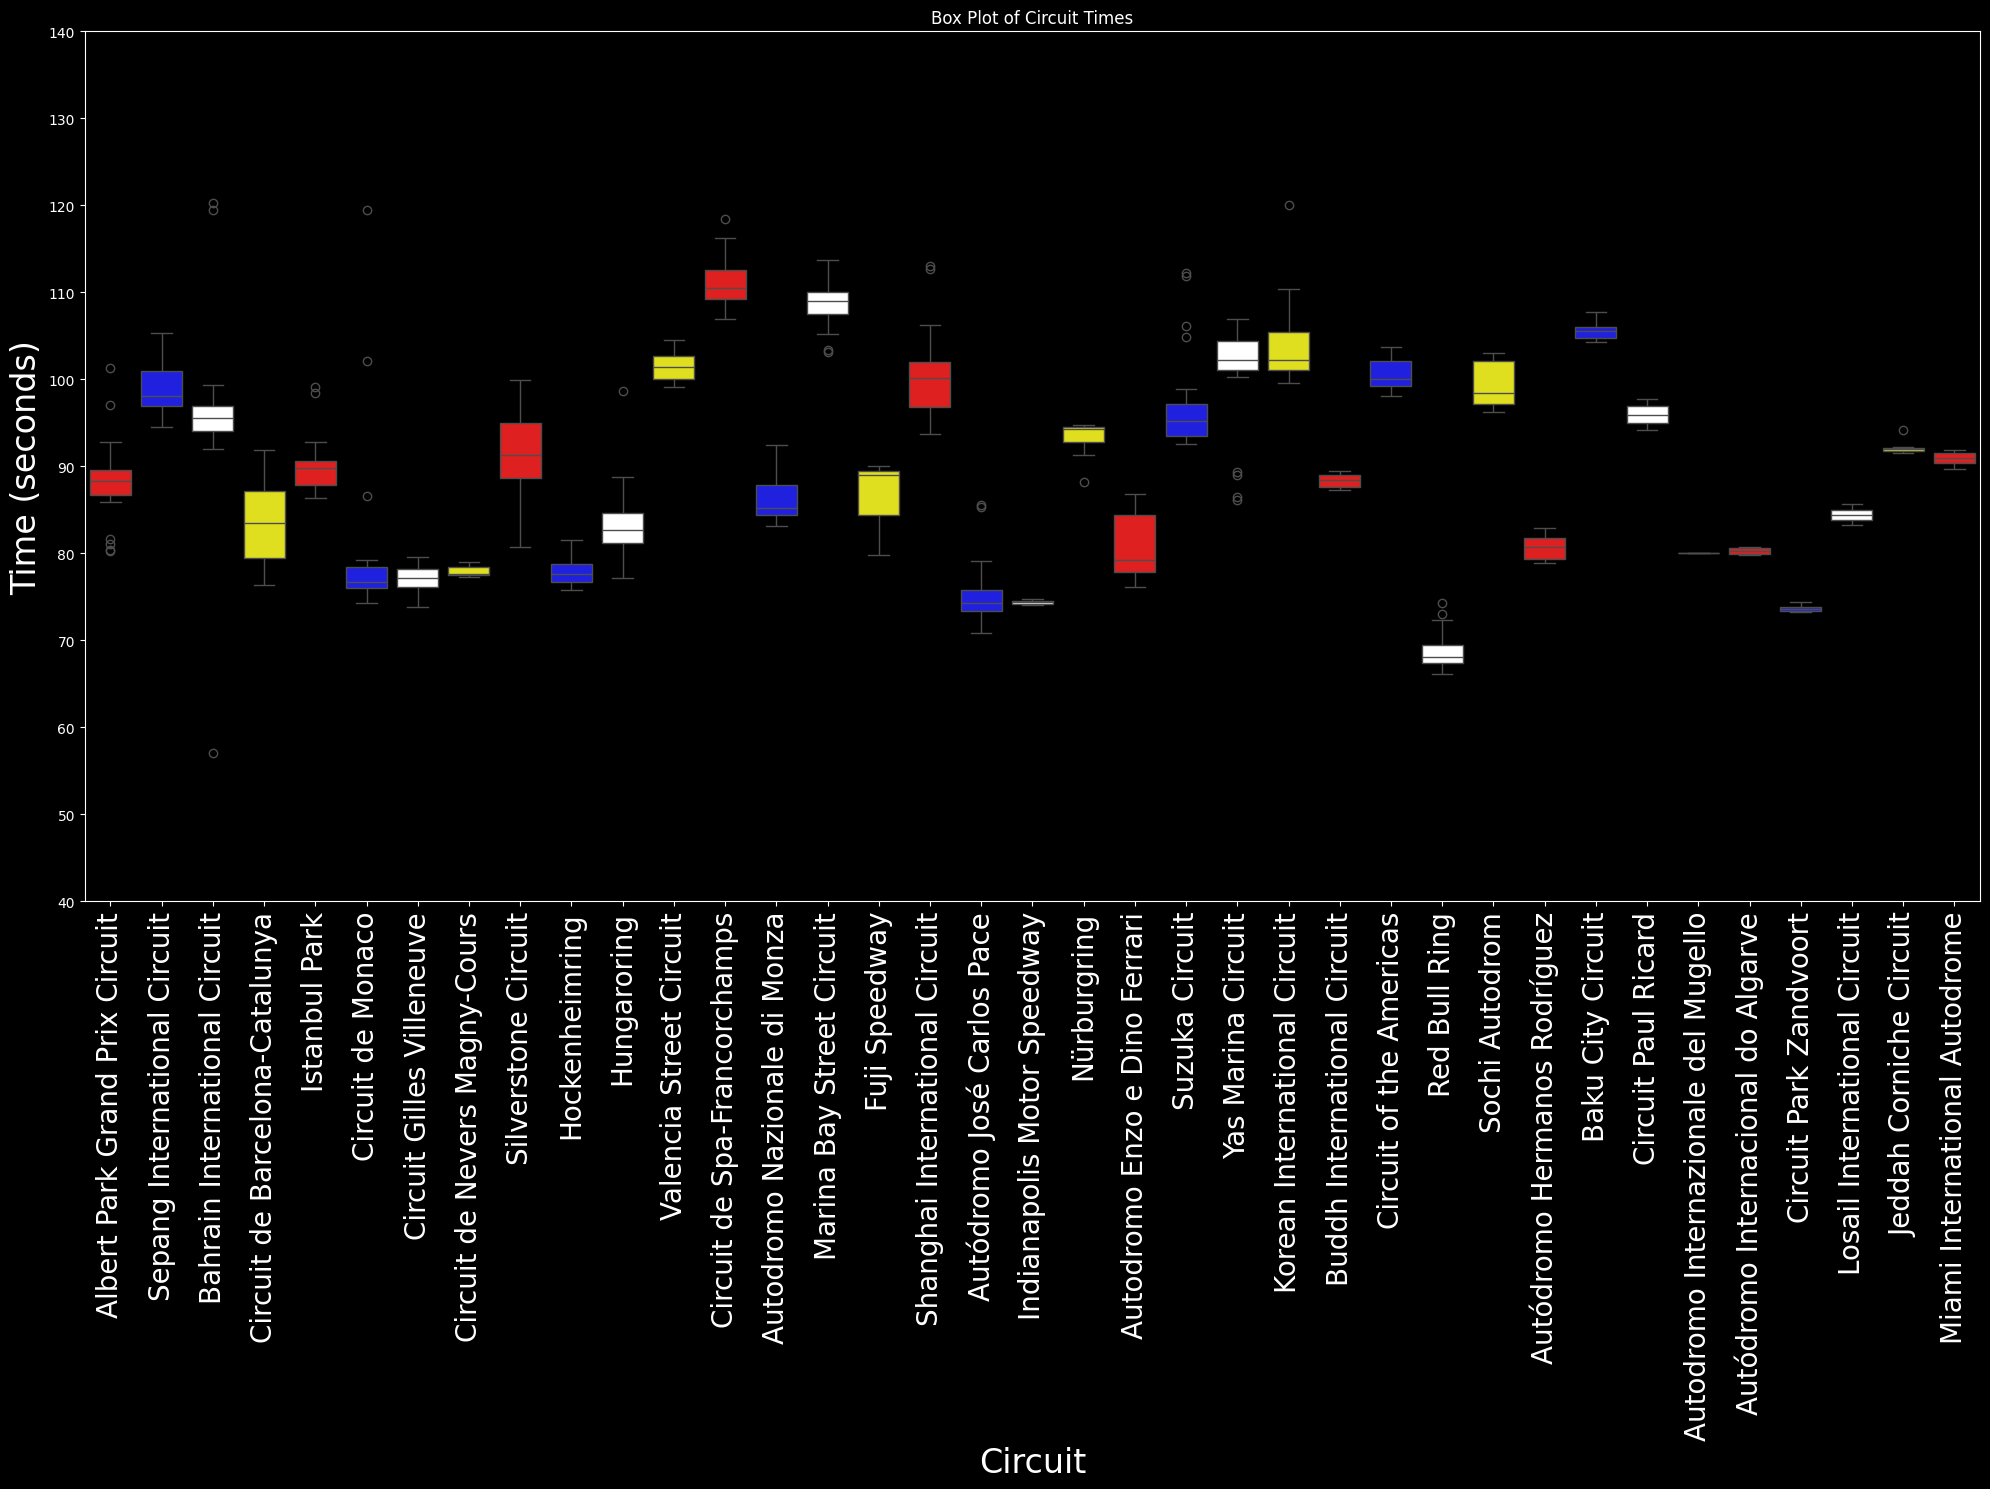

In [7]:
#Circuit vs Lap timing

import seaborn as sns
def converMinSec2Sec(time_string):
    minutes, seconds = map(float, time_string.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds

circuit_vs_lap_timing = {}
print(f'Number of races : {len(races_participated)}')
results_df_filtured = dataset['results_df'][dataset['results_df']['constructorId'] == constructorId]
results_df_filtured.head()
results_df_filtured = results_df_filtured[results_df_filtured['fastestLapTime'] != '\\N']
print(results_df_filtured['fastestLapTime'].describe())
results_df_filtured['fasestLapSeconds'] = results_df_filtured['fastestLapTime'].apply(converMinSec2Sec)
results_df_filtured.head()
results_df_filtured = results_df_filtured[['resultId','raceId', 'driverId','fasestLapSeconds' ]]
results_df_filtured = pd.merge(results_df_filtured , dataset['races_df'][['circuitId','raceId','year']], on='raceId')
results_df_filtured = pd.merge(results_df_filtured , dataset['circuits_df'][['name','circuitId']], on= 'circuitId')
print(results_df_filtured.head())

for index, row in results_df_filtured.iterrows():
    try:
        circuit_vs_lap_timing[row['name']].append(float(row['fasestLapSeconds']))
    except:
        circuit_vs_lap_timing[row['name']] = [float(row['fasestLapSeconds'])]

# print(circuit_vs_lap_timing)
# Create a DataFrame from the dictionary
data = pd.DataFrame.from_dict(circuit_vs_lap_timing, orient='index')
data = data.transpose()


# Create a colormap with a linear gradient from red to blue to white to yellow
sns_colormap = sns.color_palette(['red', 'blue', 'white', 'yellow'], as_cmap=True)

# Plot the box plot
plt.figure(figsize=(20,15))
boxprops = dict(linewidth=1.5, color='white')
sns.boxplot(data=data, palette=sns_colormap)

# Set the x-axis labels based on the keys of the dictionary
plt.xticks(range(len(data.columns)), data.columns, rotation=90,fontsize=20)
plt.ylim(40, 140)
plt.yticks(range(40, 141, 10))

# Set the labels and title
plt.xlabel('Circuit',fontsize=24)
plt.ylabel('Time (seconds)',fontsize=24)
plt.title('Box Plot of Circuit Times')

# Display the plot
plt.tight_layout()
plt.show()

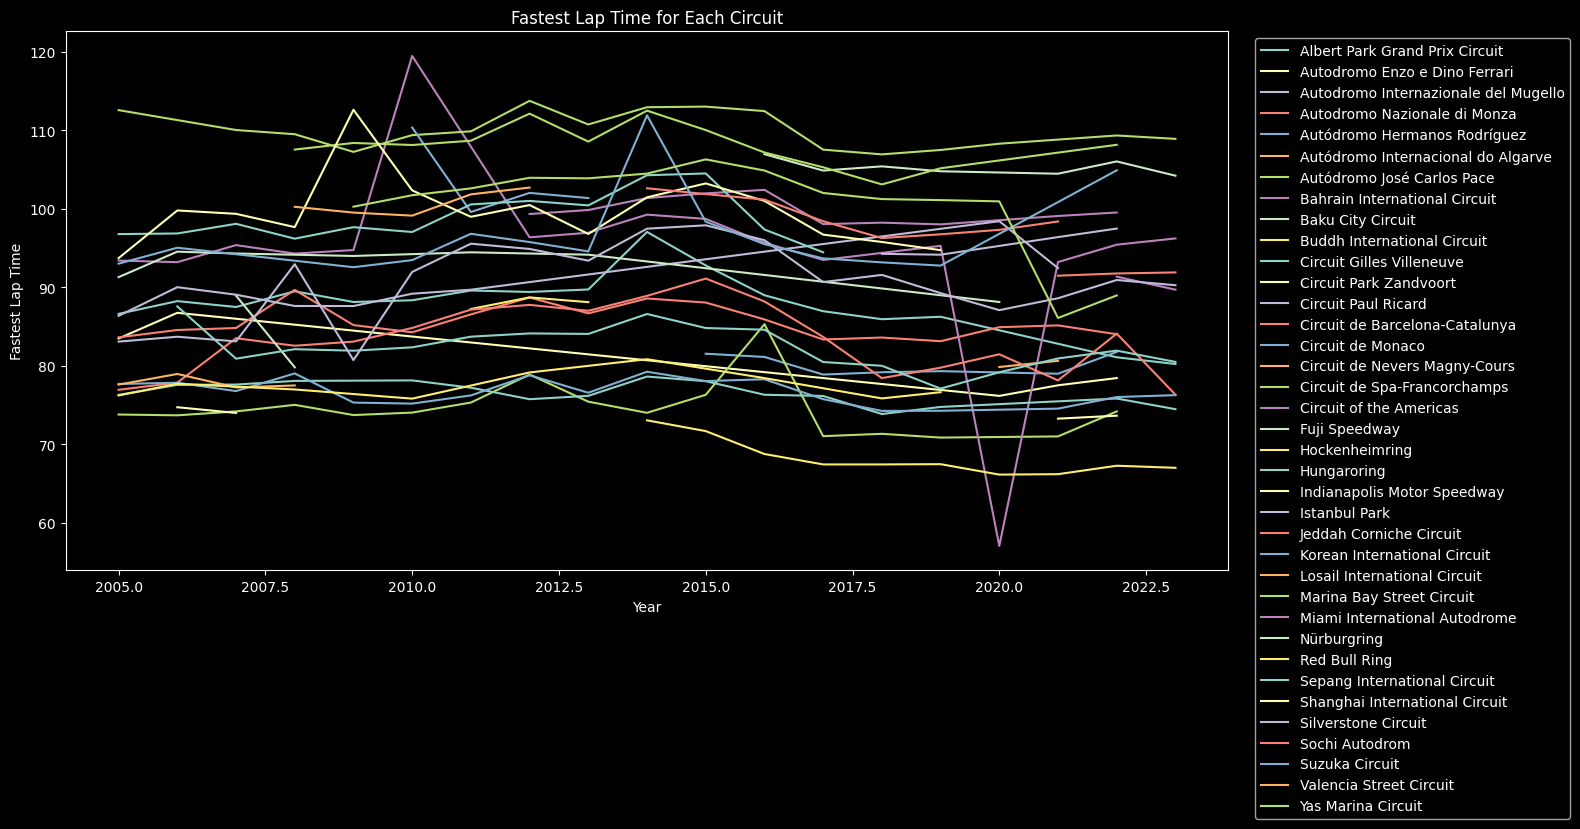

In [8]:
#fastest laptime vs years, circuits

results_df_filtured.head()
fastest_laptime_years_circuits = {}
crr= 0
err= 0

for index, row in results_df_filtured.iterrows():
    year = row['year']
    fasestLapSeconds = row['fasestLapSeconds']
    name = row['name']
    
    try:
        fastest_laptime_years_circuits[name][year] = min(fastest_laptime_years_circuits[name][year],fasestLapSeconds)
        crr+=1
    except:
        try:
            fastest_laptime_years_circuits[name][year]= fasestLapSeconds
        except:
            fastest_laptime_years_circuits[name]= {year:fasestLapSeconds}
        err+=1
        
# print(crr,err)
# print(fastest_laptime_years_circuits)
sorted_data = {}
for circuit, data in sorted(fastest_laptime_years_circuits.items()):
    sorted_years = sorted(data.keys())
    sorted_data[circuit] = {year: data[year] for year in sorted_years}
fastest_laptime_years_circuits = sorted_data

fig, ax = plt.subplots(figsize=(15, 7))

# Iterate over each circuit and plot the fastest lap time for each year
for circuit, lap_times in fastest_laptime_years_circuits.items():
    years = list(lap_times.keys())
    times = list(lap_times.values())
    ax.plot(years, times, label=circuit)

ax.set_xlabel('Year')
ax.set_ylabel('Fastest Lap Time')
ax.set_title('Fastest Lap Time for Each Circuit')
ax.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

plt.show()

In [9]:
from ipywidgets import interact, widgets
import matplotlib.gridspec as gridspec
import numpy as np

circuits = fastest_laptime_years_circuits.keys()

def plot_graph(circuit):
    circuit_data = fastest_laptime_years_circuits[circuit]
    years_ = list(circuit_data.keys())
    fastest_lap_ = list(circuit_data.values())
    
    colors = np.linspace(0, 1, len(years_))

    # Create a grid with 1 row and 2 columns for both plots
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

    # Line plot
    ax1 = plt.subplot(gs[0])
    ax1.set_xticks(years_)
    ax1.set_xticklabels(years_, rotation=45, ha='right')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Fastest Lap Timing')
    ax1.set_title(f'{circuit} Yearly Fastest Lap Timing')

    for i in range(len(years_) - 1):
        ax1.plot([years_[i], years_[i + 1]], [fastest_lap_[i], fastest_lap_[i + 1]], color=PRGn(colors[i % len(colors)]),
                 label='Red Bull Racing')
    # Box plot
    ax2 = plt.subplot(gs[1])
    ax2.boxplot(fastest_lap_, vert=True)
    ax2.set_yticklabels([])
    ax2.set_xlabel('Fastest Lap Timing')
    ax2.set_title(f'{circuit} Fastest Lap Timing Box Plot')

    plt.show()
    
    range_of_years = (min(years_), max(years_))
    faster_or_slower = fastest_lap_[-1] - fastest_lap_[0]
    faster_or_slower_word = ""
    if faster_or_slower > 0 :
        faster_or_slower_word = "SLOWER"
    elif faster_or_slower < 0 :
        faster_or_slower_word = "FASTER"
    else:
        faster_or_slower_word = "UNCHANGED"
    faster_or_slower = abs(faster_or_slower)
    print(f'Short Summary : ')
    print(f'{circuit} raced in this circuit from {range_of_years[0]} to {range_of_years[1]}')
    print(f'They became {faster_or_slower_word} by {faster_or_slower} seconds')

# Create the interactive dropdown
interact(plot_graph, circuit=widgets.Dropdown(options=circuits))
print()

interactive(children=(Dropdown(description='circuit', options=('Albert Park Grand Prix Circuit', 'Autodromo En…

In [10]:
results_df = dataset['results_df'][dataset['results_df']['constructorId'] == constructorId]
results_df = pd.merge(results_df,dataset['races_df'][['raceId', 'year']],on ="raceId" )
results_df = pd.merge(results_df,dataset['status_df'], on="statusId")
status_cat = {
    "Completed" : ["Finished"],
    "Lapped_completion" : ["+1 Laps", "+2 Laps","+3 Laps","+4 Laps","+5 Laps","+6 Laps","+7 Laps","+8 Laps","+8 Laps", "+11 Laps", "+17 Laps"],
    "Disqualified" : ["Disqualified"],
    "Accidents" : ["Accident","Collision", "Puncture", "Retired"],
    "Car Issues" : ["All others"]
}
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,status
0,14,18,14,9,9,8,\N,R,14,0.0,25,\N,\N,21,11,1:29.502,213.300,4,2008,Collision
1,17,18,17,9,10,14,\N,R,17,0.0,0,\N,\N,\N,\N,\N,\N,4,2008,Collision
2,188,26,14,9,9,11,\N,R,20,0.0,0,\N,\N,\N,\N,\N,\N,4,2008,Collision
3,328,33,14,9,9,11,\N,R,20,0.0,0,\N,\N,\N,\N,\N,\N,4,2008,Collision
4,368,35,14,9,9,14,\N,R,20,0.0,0,\N,\N,\N,\N,\N,\N,4,2008,Collision


In [11]:
yearly_status = {}
for index,row in results_df.iterrows():
    year = row["year"]
    status = row["status"]
    try:
        yearly_status[year][status]+=1
    except:
        try:
            yearly_status[year][status] = 1
        except:
            yearly_status[year] = {status: 1}
yearly_status = {year: yearly_status[year] for year in sorted(yearly_status.keys())}

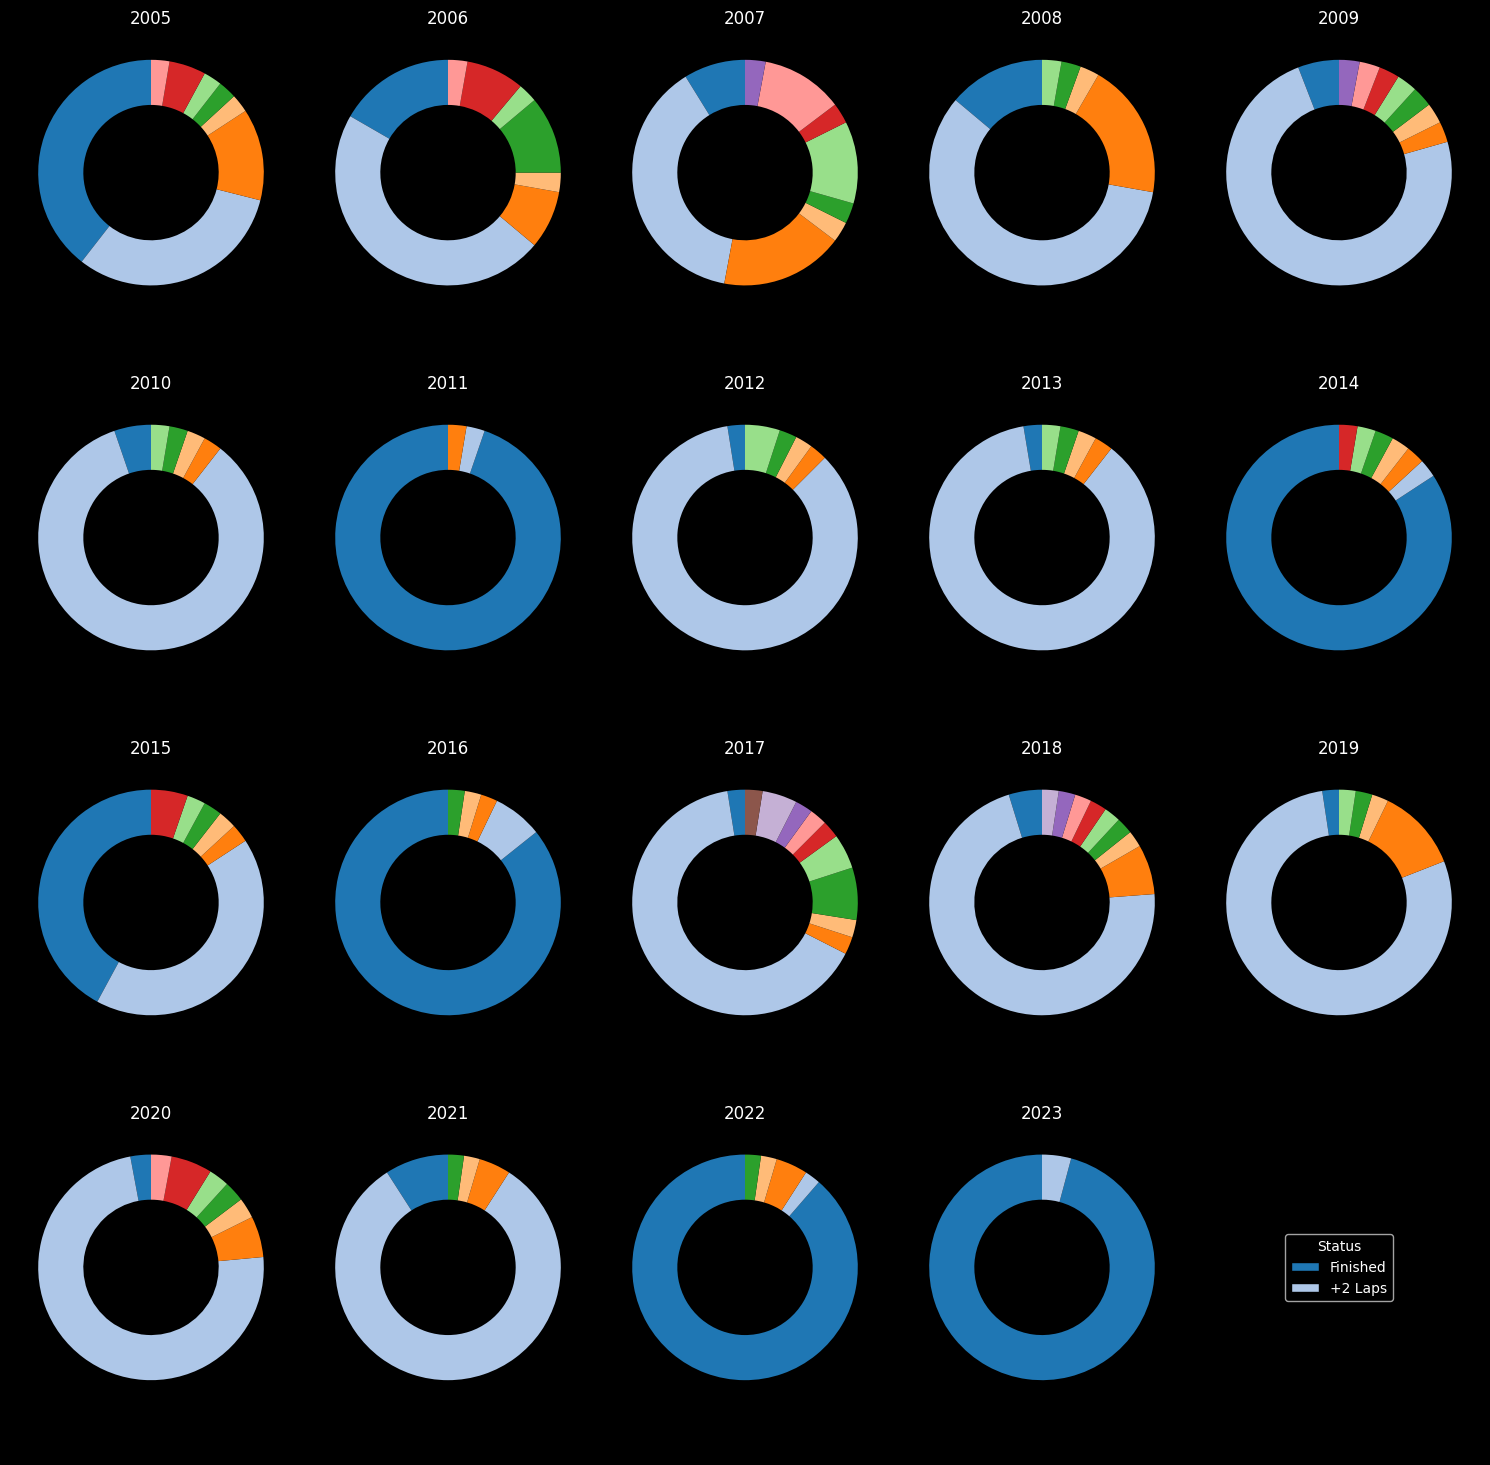

In [12]:
from matplotlib.patches import Patch

# Calculate percentages for each year
def calculate_percentages(status_dict):
    total = sum(status_dict.values())
    return {status: (count / total) * 100 for status, count in status_dict.items()}

# Create a grid of subplots
years = yearly_status.keys()
num_rows = 4  # Number of rows in the grid
num_cols = (len(years) + num_rows - 1) // num_rows  # Number of columns in the grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Define a custom color map for statuses
status_colors = plt.cm.tab20.colors

# Plot donut pie chart for each year
for i, year in enumerate(years):
    status_data = yearly_status[year]
    percentages = calculate_percentages(status_data)
    statuses = list(percentages.keys())
    values = list(percentages.values())

    # Plot donut pie chart with custom colors and without labels
    ax = axs[i // num_cols, i % num_cols]
    wedges, _, autotexts = ax.pie(
        values,
        colors=status_colors[:len(statuses)],
        wedgeprops=dict(width=0.4),
        autopct='%1.1f%%',
        startangle=90,
    )
    ax.set(aspect="equal", title=f"{year}")

    # Hide labels
    for autotext in autotexts:
        autotext.set_visible(False)

# Create a single legend for all statuses
legend_elements = [Patch(facecolor=status_colors[i], edgecolor='black', label=status) for i, status in enumerate(statuses)]

# Remove x and y axis and ticks from empty subplots in the last row
for i in range(len(years), num_rows * num_cols):
    axs.flat[i].axis('off')

# Position the legend in the last subplot of the last row
axs[-1, -1].axis('off')
axs[-1, -1].legend(handles=legend_elements, title='Status', loc='center', bbox_to_anchor=(0.5, 0.5))



# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [13]:
#Top drivers of RedBull Racing

driverStandingDf = dataset['results_df'][(dataset['results_df']['constructorId'] == constructorId) &(dataset['results_df']['positionOrder'] <= 3)]
driverStandingDf.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
130,131,24,14,9,9,13,3,3,3,6.0,70,+23.352,5807579,36,7,1:18.085,201.057,1
568,569,45,17,9,15,6,3,3,3,6.0,60,+1:05.674,7652032,29,8,1:34.449,196.220,1
876,877,59,14,9,14,7,3,3,3,6.0,78,+52.298,6275414,45,19,1:17.849,154.452,1
7593,7594,3,20,9,15,1,1,1,1,10.0,56,1:57:43.485,7063485,42,2,1:52.627,174.235,1
7594,7595,3,17,9,14,3,2,2,2,8.0,56,+10.970,7074455,42,4,1:52.980,173.690,1
7614,7615,4,20,9,15,3,2,2,2,8.0,57,+7.187,5515369,16,4,1:34.756,205.614,1
7635,7636,5,17,9,14,5,3,3,3,6.0,66,+13.924,5853126,18,5,1:23.112,201.631,1
7674,7675,7,17,9,14,4,2,2,2,8.0,58,+6.714,5191562,42,3,1:27.809,218.847,1
7675,7676,7,20,9,15,1,3,3,3,6.0,58,+7.461,5192309,51,2,1:27.622,219.314,1
7693,7694,8,20,9,15,1,1,1,1,10.0,60,1:22:49.328,4969328,16,1,1:20.735,229.238,1


In [14]:
driverIdsAndNoOfPodiums = {}
def getDriverNameFromId(driverId):
    filtered_df = dataset['drivers_df'][(dataset['drivers_df']['driverId'] == driverId)][['forename','surname']]
    full_name = filtered_df['forename'] + " " + filtered_df['surname']
    return full_name.values[0]
for index, row in driverStandingDf.iterrows():
    try:
        driverIdsAndNoOfPodiums[row['driverId']] +=1
    except:
        driverIdsAndNoOfPodiums[row['driverId']] =1
driverIdsAndNoOfPodiums = dict(sorted(driverIdsAndNoOfPodiums.items(), key=lambda item: item[1], reverse=True))
names_ = [getDriverNameFromId(driverId) for driverId in driverIdsAndNoOfPodiums.keys()]
podiums_ = list(driverIdsAndNoOfPodiums.values())
print(driverIdsAndNoOfPodiums)
max_verstappen_driverId = 830


{830: 89, 20: 65, 17: 41, 817: 29, 815: 23, 14: 2, 826: 2, 848: 2}


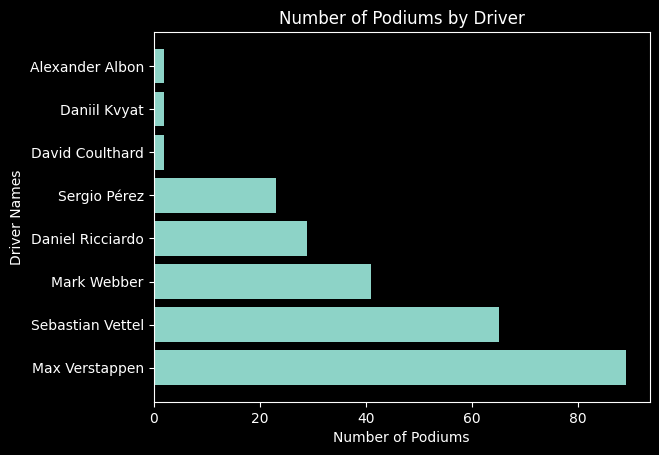

Top 3 Drivers of RedBull : 
Max Verstappen have 89 podiums
Sebastian Vettel have 65 podiums
Mark Webber have 41 podiums


In [16]:
# Create a horizontal bar chart
plt.barh(names_, podiums_)

# Add labels and title
plt.xlabel('Number of Podiums')
plt.ylabel('Driver Names')
plt.title('Number of Podiums by Driver')

# Show the plot
plt.show()

print(f"Top 3 Drivers of RedBull : ")
for i in range(3):
    print(f"{names_[i]} have {podiums_[i]} podiums")

In [17]:
# MAX VERSTAPPEN
#Quali position vs Race Position

quali_filtered_df = dataset["qualifying_df"][(dataset["qualifying_df"]['constructorId'] == constructorId) & (dataset["qualifying_df"]['driverId'] == max_verstappen_driverId)]
quali_filtered_df.head()
filtired_df = pd.merge(quali_filtered_df, dataset["results_df"], on= ['raceId','driverId','constructorId' ])
filtired_df.head(20)

,qualifyId,raceId,driverId,constructorId,number_x,position_x,q1,q2,q3,resultId,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,6774,952,830,9,33,4,1:23.578,1:23.178,1:23.087,23005,...,1,25.0,66,1:41:40.017,6100017,36,6,1:28.816,188.682,1
1,6813,953,830,9,33,21,1:22.467,\N,\N,23044,...,18,0.0,34,\N,\N,34,18,1:26.563,138.779,3
2,6819,954,830,9,33,5,1:14.601,1:13.793,1:13.414,23052,...,4,12.0,70,+53.020,5518316,49,4,1:16.319,205.710,1
3,6844,955,830,9,33,9,1:44.939,1:44.387,1:45.570,23078,...,8,4.0,51,+1:10.696,5643062,50,3,1:46.973,202.021,1
4,6866,956,830,9,33,9,1:07.131,1:06.866,1:11.153,23094,...,2,18.0,71,+5.719,5263826,69,5,1:09.618,223.700,1
5,6882,957,830,9,33,3,1:31.305,1:30.697,1:30.313,23116,...,2,18.0,52,+8.250,5704081,41,6,1:36.407,219.979,1
6,6904,958,830,9,33,4,1:40.424,1:22.660,1:20.557,23141,...,5,10.0,70,+48.659,6078774,40,7,1:24.687,186.234,1
7,6926,959,830,9,33,4,1:15.875,1:15.124,1:14.834,23161,...,3,15.0,67,+13.413,5457613,47,4,1:18.910,208.673,1
8,6946,960,830,9,33,2,1:48.407,1:47.163,1:46.893,23191,...,11,0.0,44,+1:11.138,6362196,32,7,1:53.281,222.582,1
9,6972,961,830,9,33,7,1:23.229,1:22.857,1:22.411,23209,...,7,6.0,53,+54.236,4702325,50,8,1:26.405,241.361,1


In [18]:
race_position = filtired_df['positionOrder'].to_list()
quali_position = filtired_df['position_x'].to_list()

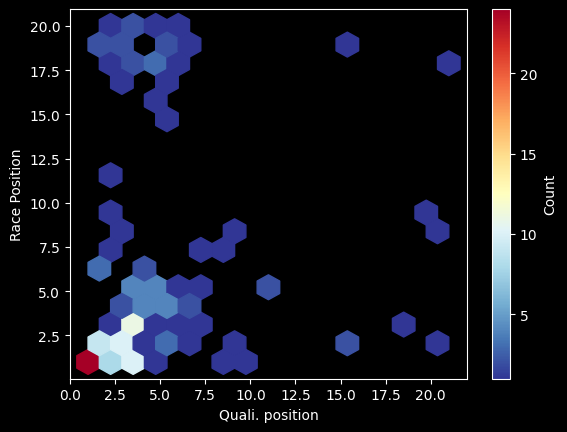

In [19]:
# Create a hexagonal scatter plot
plt.hexbin(quali_position, race_position, gridsize=16, cmap='RdYlBu_r', mincnt=1)

# Add color bar and labels
plt.colorbar(label='Count')
plt.xlabel('Quali. position')
plt.ylabel('Race Position')


# Show the plot
plt.show()
